In [27]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [28]:
y   = load('../../March2021/Observation_models/ObsY.joblib')
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
histEns = load ('FF_historical_ensembleMean_Best5.joblib')

In [29]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.22800775


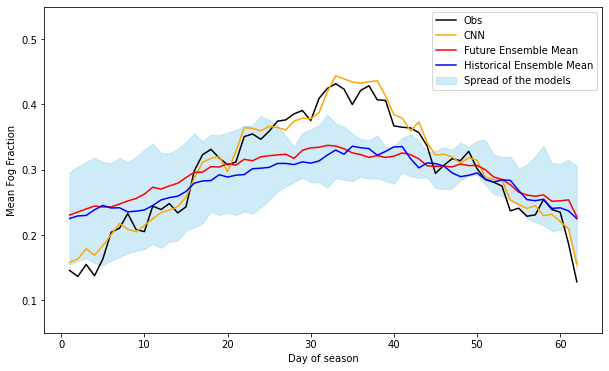

0.23056836
0.23527256
0.2398381
0.24445793
0.24283203
0.24301143
0.24736238
0.25212818
0.2558493
0.26268023
0.2731166
0.2703523
0.2751652
0.2793209
0.28795174
0.29611236
0.29628536
0.3048026
0.30409718
0.30932337
0.30704355
0.31596118
0.3137268
0.31983727
0.32143632
0.32274228
0.3237099
0.317432
0.32977661
0.33349618
0.3344317
0.3373356
0.3363626
0.33214784
0.32580465
0.32323223
0.31884465
0.3217247
0.3187962
0.3207905
0.32577354
0.32306692
0.31672764
0.305986
0.3051939
0.30521005
0.30434948
0.3086574
0.30634284
0.3065563
0.3000106
0.28885767
0.28525302
0.27697858
0.26559633
0.26106396
0.25941196
0.2614121
0.25161797
0.25236896
0.25378525
0.22800775


In [30]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
TabList=[]
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
TabList.append(OTs)

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp126/Modelplots_future/'+cL+'_ssp126.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
TabList.append(meanMS)
minMS=np.amin(MS,axis=0)
TabList.append(minMS)
maxMS=np.amax(MS,axis=0)
TabList.append(maxMS)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_126_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()

print('\n'.join(map(str, meanMS))) 


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.2509838


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


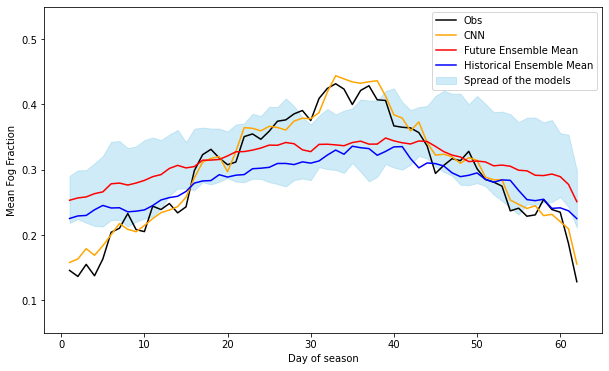

0.25320196
0.2567411
0.2583064
0.2633081
0.266027
0.2783953
0.2795138
0.27647775
0.27958068
0.28364265
0.2893722
0.29253113
0.301956
0.3066782
0.30276045
0.3047717
0.31458962
0.31477085
0.31571987
0.3211736
0.32744813
0.32783374
0.3300579
0.33322257
0.33773035
0.33748844
0.34174675
0.33983248
0.33053356
0.32771707
0.33884555
0.33908543
0.3380848
0.33677745
0.34165758
0.3437737
0.33920902
0.33928064
0.34862003
0.34424728
0.34132558
0.33945698
0.34407976
0.34324417
0.33574694
0.327716
0.32238123
0.31958598
0.3125161
0.31327143
0.3119678
0.3059718
0.30712417
0.3053027
0.29918075
0.2983474
0.2914826
0.2910234
0.293383
0.28938842
0.27747402
0.2509838


In [31]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp245/Modelplots_future/'+cL+'_ssp245.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_245_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()

print('\n'.join(map(str, meanMS))) 

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.29672983


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

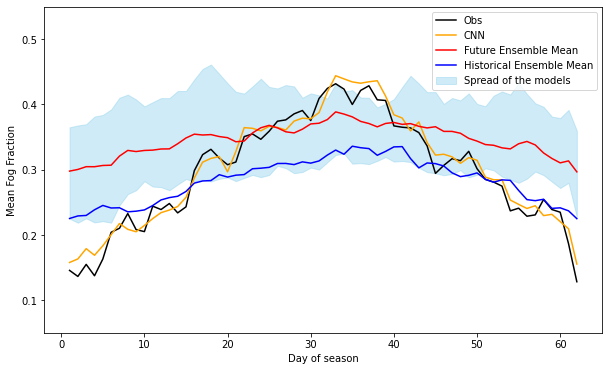

0.29785496
0.3004261
0.30465025
0.3045992
0.30651253
0.30692846
0.32087842
0.3295995
0.32787
0.32953602
0.33005247
0.33176056
0.33196384
0.33980426
0.34865072
0.35450453
0.35322696
0.35383782
0.35085672
0.34911066
0.34285235
0.34400797
0.35636693
0.36431822
0.3679924
0.36415598
0.35812622
0.35639074
0.36215794
0.3701904
0.37126184
0.3768569
0.38865674
0.3852908
0.3810109
0.37409502
0.37080377
0.3657357
0.3709319
0.37243485
0.36955425
0.3706831
0.36653382
0.3640945
0.36589104
0.35877925
0.3587263
0.3559182
0.3480816
0.34387985
0.3385901
0.33746338
0.3335431
0.33192974
0.3397712
0.3433463
0.3380029
0.325697
0.3172733
0.31053275
0.31352478
0.29672983


In [32]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp370/Modelplots_future/'+cL+'_ssp370.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_370_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
print('\n'.join(map(str, meanMS))) 

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.27016345


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

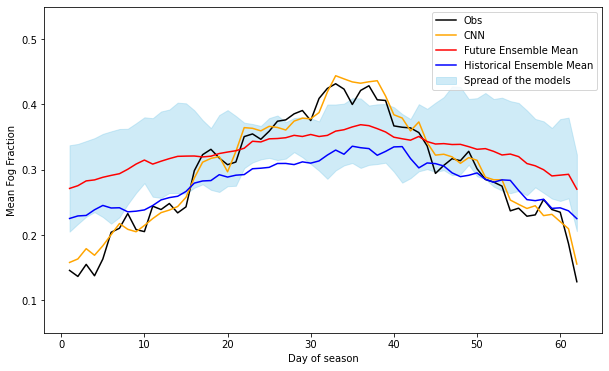

0.27132666
0.27550024
0.28284812
0.28438154
0.28838688
0.2913018
0.29389238
0.30069748
0.3086727
0.31482387
0.30861676
0.3130501
0.3170153
0.3204914
0.32087243
0.32102916
0.31961337
0.32075894
0.32482368
0.32708815
0.32913226
0.33292088
0.34363568
0.34259626
0.34735274
0.3478319
0.34906572
0.35270947
0.35094664
0.35400873
0.35093275
0.35261238
0.35916847
0.36129966
0.36561507
0.36899677
0.36753342
0.3629716
0.3578809
0.34984285
0.34744534
0.34530127
0.35100025
0.34317306
0.33940932
0.3400143
0.33861598
0.33889207
0.33532482
0.33131307
0.33233055
0.32812387
0.32260042
0.3240175
0.3200995
0.30949438
0.3060053
0.3000184
0.29047534
0.29168075
0.29298288
0.27016345


In [33]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp585/Modelplots_future/'+cL+'_ssp585.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_585_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
print('\n'.join(map(str, meanMS)))